In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_csv(r'C:\Program Files\amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
df.rating.value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [5]:
review_text = df.drop(['rating','date','variation','feedback'],axis=1)
review_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [6]:
df['review_lower'] = review_text.apply(lambda x: x.astype(str).str.lower())
df['review_lower']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_lower, Length: 3150, dtype: object

In [7]:
#defining the function to remove punctuation
import re
import nltk
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['review_nopunc']= df['review_lower'].apply(lambda x: remove_punctuation(x))

df['review_nopunc']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_nopunc, Length: 3150, dtype: object

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['review_noemoji'] = df['review_nopunc'].apply(lambda x: remove_emoji(x))
df['review_noemoji']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_noemoji, Length: 3150, dtype: object

In [9]:
# EMOTICONS=[':-<',':->']
# def remove_emoticons(text):
#     emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
#     return emoticon_pattern.sub(r'', text)

# df['review_noemoticons'] = df['review_noemoji'].apply(lambda x: remove_emoticons(x))

# df['review_noemoticons']

In [10]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['msg_tokenized']= df['review_noemoji'].apply(lambda x: tokenization(x))

df['msg_tokenized']
tokenizer = Tokenizer(num_words = 500, split = ' ') 
tokenizer.fit_on_texts(df['verified_reviews'].values)
x = tokenizer.texts_to_sequences(df['verified_reviews'].values) 
print(x[0])
print(x[1])
X = pad_sequences(x)


[10, 7, 11]
[267, 4]


In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\harpreet
[nltk_data]     soni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stop = " ".join([word for word in str(text).split(' ') if word not in STOPWORDS])
    return no_stop

df["text_wo_stop"] = df["msg_tokenized"].apply(lambda x: remove_stopwords(x))
df["text_wo_stop"]

0                                           ['love echo']
1                                            ['loved it']
2       ['sometimes playing game answer question corre...
3       ['i lot fun thing 4 yr old learns dinosaurs co...
4                                               ['music']
                              ...                        
3145             ['perfect kids adults everyone between']
3146    ['listening music searching locations checking...
3147    ['i love things running entire home tv lights ...
3148    ['only complaint sound quality isnt great most...
3149                                             ['good']
Name: text_wo_stop, Length: 3150, dtype: object

In [13]:
# from nltk.stem.porter import PorterStemmer

# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text.split()])

# df["text_stemmed"] = df["text_wo_stop"].apply(lambda x: stem_words(x))
# df["text_stemmed"]

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda x: lemmatize_words(x))
df["text_lemmatized"]

[nltk_data] Downloading package wordnet to C:\Users\harpreet
[nltk_data]     soni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                           ['love echo']
1                                            ['loved it']
2       ['sometimes playing game answer question corre...
3       ['i lot fun thing 4 yr old learns dinosaur con...
4                                               ['music']
                              ...                        
3145               ['perfect kid adult everyone between']
3146    ['listening music searching location checking ...
3147    ['i love thing running entire home tv light th...
3148    ['only complaint sound quality isnt great most...
3149                                             ['good']
Name: text_lemmatized, Length: 3150, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
data_bow = bow.fit_transform(df['verified_reviews'])
print("n_samples: %d, n_features: %d" % data_bow.shape)

n_samples: 3150, n_features: 4044


In [16]:
print(bow.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

C:\Users\harpreet soni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
print(data_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
data_tf = tf_idf.fit_transform(df['verified_reviews'])
print("n_samples: %d, n_features: %d" % data_tf.shape)


n_samples: 3150, n_features: 4044


In [19]:
print(tf_idf.get_feature_names())


['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [20]:
print(data_tf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(-0.5, 399.5, 199.5, -0.5)

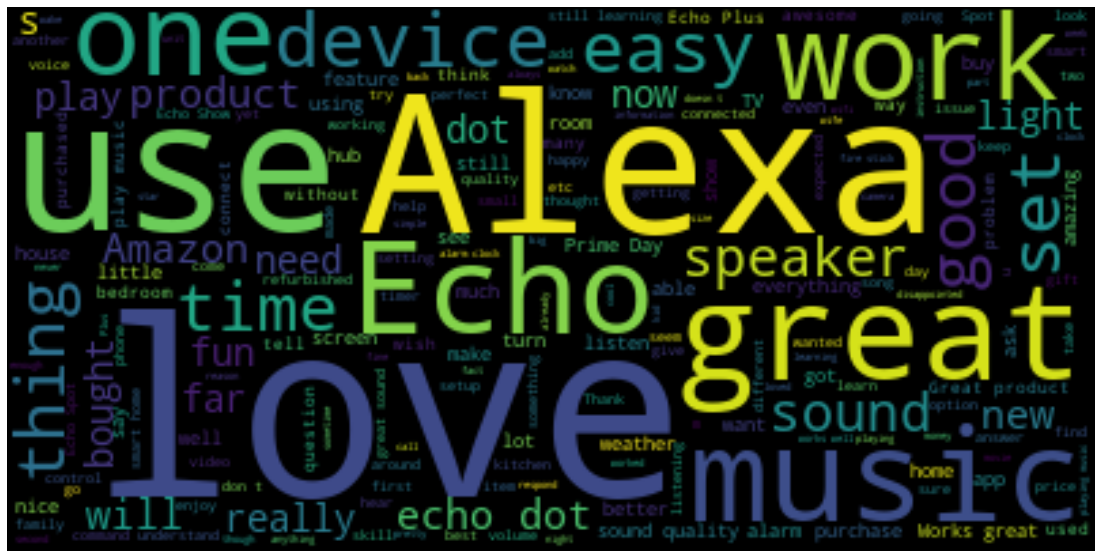

In [21]:
import wordcloud
common_words=''
for i in df.verified_reviews:
    i = str(i)
    tokens = i.split(' ')
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [22]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_lower,review_nopunc,review_noemoji,msg_tokenized,text_wo_stop,text_lemmatized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,[love my echo],['love echo'],['love echo']
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,[loved it],['loved it'],['loved it']
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,[sometimes while playing a game you can answer...,['sometimes playing game answer question corre...,['sometimes playing game answer question corre...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,[i have had a lot of fun with this thing my 4 ...,['i lot fun thing 4 yr old learns dinosaurs co...,['i lot fun thing 4 yr old learns dinosaur con...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,[music],['music'],['music']


In [40]:
y=df['feedback']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [41]:
X=pd.DataFrame(X)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [25]:
df.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [26]:
# try gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

model1 = GradientBoostingClassifier( max_depth=6,learning_rate=0.09,
    n_estimators=100)
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print(model1.score(X_train,y_train)*100)
print("ACCURACY OF THE MODEL: ", model1.score(X_test,y_test)*100)


98.29365079365078
ACCURACY OF THE MODEL:  92.53968253968254


              precision    recall  f1-score   support

           0       0.76      0.28      0.41        58
           1       0.93      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.85      0.63      0.68       630
weighted avg       0.92      0.93      0.91       630



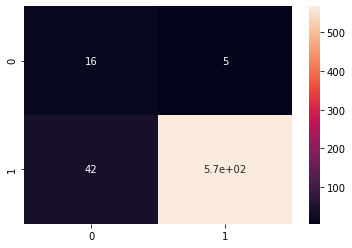

In [27]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators =100,max_depth=32,max_leaf_nodes=3) 
clf.fit(X,y)
y_pred = clf.predict(X_test)

from sklearn import metrics 
print(clf.score(X_train,y_train)*100)
print("ACCURACY OF THE MODEL: ", clf.score(X_test,y_test)*100)

92.1031746031746
ACCURACY OF THE MODEL:  90.7936507936508


In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10,penalty='l2',solver='lbfgs')
lr.fit(X_train, y_train)
lrg=lr.predict(X_test)
print(lr.score(X_train,y_train)*100)
print("ACCURACY OF THE MODEL: ", lr.score(X_test,y_test)*100)

92.61904761904762
ACCURACY OF THE MODEL:  90.95238095238095


C:\Users\harpreet soni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.naive_bayes import MultinomialNB
nv=MultinomialNB()
nv.fit(X_train,y_train)


MultinomialNB()

              precision    recall  f1-score   support

           0       0.24      0.26      0.25        54
           1       0.93      0.92      0.93       576

    accuracy                           0.87       630
   macro avg       0.58      0.59      0.59       630
weighted avg       0.87      0.87      0.87       630



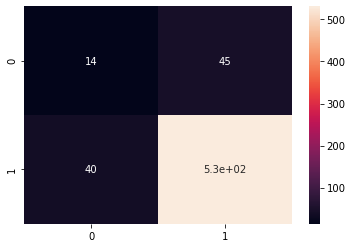

In [43]:
ypred_nv= nv.predict(X_test)
cm = confusion_matrix(ypred_nv, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, ypred_nv))

In [44]:
print(nv.score(X_train,y_train)*100)
print("ACCURACY OF THE MODEL: ", nv.score(X_test,y_test)*100)

84.76190476190476
ACCURACY OF THE MODEL:  86.5079365079365
